## User Login Activity Notebook

This notebook is designed to pull all user LMS sign in activity dates and times using the edfi_lms_file_utils file_reader functions and format the data into visualizations.

In [1]:
import pandas as pd
import os
import matplotlib as plt

# Load this helper module to access the functions
# Instead of loading from a published package, we're going to hack the 
# module search path to find the package on the local file system.
import sys

from edfi_lms_file_utils import file_reader

In [2]:
# set the directory path for the output files from schoology extractor
csv_path = os.path.join("..", "schoology-extractor", "data")

In [3]:
# pull user data into a dataframe
users_df = file_reader.get_all_users(csv_path)

# pull login data into a dataframe
logins_df = file_reader.get_all_system_activities(csv_path)

In [4]:
# merge user and login data for schoology
user_logins_df = pd.DataFrame()
user_logins_df = pd.merge(users_df, logins_df, how='inner', left_on=('SourceSystemIdentifier', 'SourceSystem'), right_on=('LMSUserSourceSystemIdentifier', 'SourceSystem'))

In [5]:
# add user and activity columns to login frequency dataframe
login_df = pd.DataFrame()
login_df = user_logins_df.loc[:,['Name', 'EmailAddress', 'SISUserIdentifier','ActivityType']].query("ActivityType not in ['sign-out']")

# drop ActivityType column
del login_df['ActivityType']

# format activity datetime to date
login_df.loc[:,'SignInDate'] = pd.to_datetime(user_logins_df.loc[:,'ActivityDateTime']).dt.date
login_df.loc[:,'SignInTime'] = pd.to_datetime(user_logins_df.loc[:,'ActivityDateTime']).dt.strftime('%I:%M %p')

# rename column headings
login_df = login_df.rename({"SISUserIdentifier":"SISId"}, axis='columns')

# drop duplicate rows
login_df = login_df.drop_duplicates()

In [6]:
# output dataframe
login_df

,Name,EmailAddress,SISId,SignInDate,SignInTime
0,Mary Archer,mary.archer@studentgps.org,604863,2020-11-04,08:05 PM
1,Mary Archer,mary.archer@studentgps.org,604863,2020-11-09,09:02 PM
2,Kyle Hughes,kyle.hughes@studentgps.org,604874,2020-11-04,05:28 PM
4,Kyle Hughes,kyle.hughes@studentgps.org,604874,2020-11-10,08:19 PM
5,Stephen Fuqua,stephen.fuqua@ed-fi.org,111111,2020-11-04,05:31 PM
6,Stephen Fuqua,stephen.fuqua@ed-fi.org,111111,2020-11-05,08:22 PM
7,Stephen Fuqua,stephen.fuqua@ed-fi.org,111111,2020-11-09,08:39 PM
8,Stephen Fuqua,stephen.fuqua@ed-fi.org,111111,2020-11-11,02:57 PM


In [7]:
# set plot color palette and style
colors = ["#03045E","#0077B6","#00B4D8"]

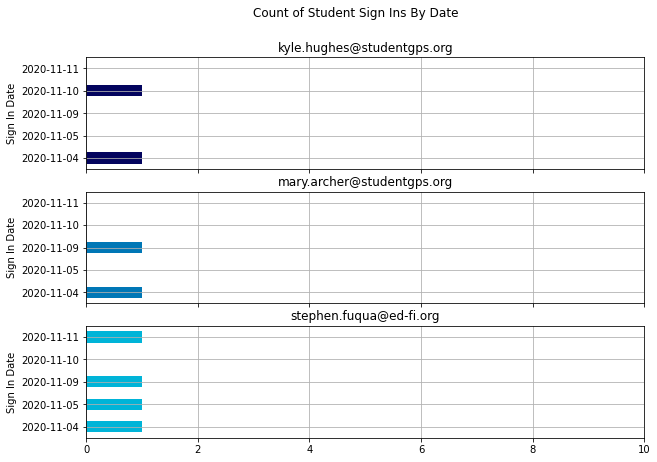

In [8]:
# define horizontal bar plot for sign in counts by date
login_frequency_plot = login_df.groupby(['SignInDate', 'EmailAddress']).EmailAddress.count().unstack().plot(kind='barh',xlabel='Sign In Date',ylabel='Sign In Counts',subplots=True,sharex=True,sharey=True,figsize=(10,7),title='Count of Student Sign In''s By Date',xlim=(0,10),legend=False,color=colors,grid=True)

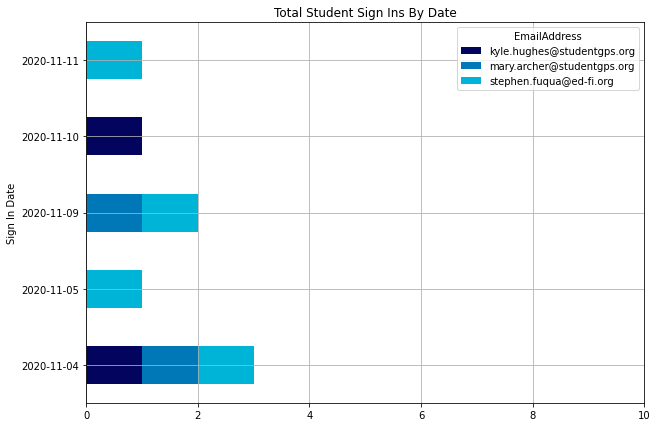

In [9]:
# define horizontal bar plot for total sign in counts by date
login_totals_plot = login_df.groupby(['SignInDate', 'EmailAddress']).EmailAddress.count().unstack().plot(stacked=True,kind='barh',xlabel='Sign In Date',ylabel='Sign In Counts',figsize=(10,7),title='Total Student Sign In''s By Date',xlim=(0,10),legend=True,color=colors,grid=True)